This notebook is used to test that I can successfully get the status of a service, even if I ask for the service to use a key to encrypt traffic

In [2]:
from Acquire.Client import Service
import datetime

In [3]:
service_url = "http://fn.acquire-aaai.com:8080/t/access"

In [4]:
t1 = datetime.datetime.now()
service = Service(service_url)
t2 = datetime.datetime.now()
print("Call took {0} s".format((t2-t1).total_seconds()))
print(service)

Call took 4.964572 s
AccessService(url=http://fn.acquire-aaai.com:8080/t/access, uid=ab495477-5781-45f3-baef-1a17f62d4c56)


In [5]:
t1 = datetime.datetime.now()
service = Service(service_url)
t2 = datetime.datetime.now()
print( "Call took {0} s".format((t2-t1).total_seconds()))

Call took 0.000147 s


In [6]:
service.call_function(function=None)

{'status': 0,
 'message': 'Success',
 'service_info': {'uid': 'ab495477-5781-45f3-baef-1a17f62d4c56',
  'service_type': 'access',
  'service_url': 'http://fn.acquire-aaai.com:8080/t/access',
  'public_certificate': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ2dLQ0FRRUExdGVHenB3Wkd4dG9EVTN2bC9peApnU3RDSUdXa1VvdnRpZFhrcEFOUUs1amZsZ1R5bTgxaFU5OTUvc0pXUjFKWDdZRlpyZVdJYlpwQ1c5dWJEd1VxClBBYmxBeFF3R1UyTUp2ZVpGaGJkQ1BjZWg4cmpiUXYxQmFFUjRCUUp0dUNZV1hvV3hFOFRLZURaWk0wWGxKTWEKdEVWdzZSanZJdW9FMStnNlg2enFVWm1PN3hBQnZDRlFGRzNzU0JBaVJldnQ1cHpsbUc2WVpFcGhmWVRtVTgzNApnZjhxSkxBMnVqT3NOUWdzUngrOFZ1amV6S3A4dE1iNmlNNUJjWDRjdVFZQlBxSEdjTzd0U1pBc1JMd0IrS3pmCjdLMVNhR0VWVjI1SktFV29pQkVzYWRBSi9RcXZEa0RZRDhDWS9iSlE4YVAvVDFZUW1FVkNUWldCNURsZ0R4ZUoKcHdJREFRQUIKLS0tLS1FTkQgUFVCTElDIEtFWS0tLS0tCg=='},
  'public_key': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ2dLQ0FRRUEyZlFPVms1TjAxN2NhaDRpMHppVQpoekpwZ3VUYXNpK0p

In [7]:
service.should_refresh_keys()

False

In [16]:
from Acquire.Client import User
admin = User("admin-%s" % service.service_type(), identity_url=service_url)

http://fn.acquire-aaai.com:8080/t/access/s?id=d24b615b


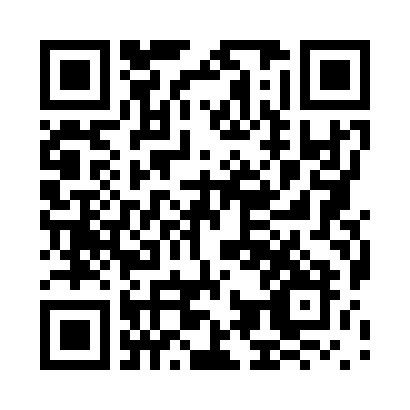

In [17]:
(url, qrcode) = admin.request_login()
print(url)
qrcode

In [12]:
admin.wait_for_login()

True

In [14]:
from Acquire.Client import Authorisation
auth = Authorisation(user=admin, resource="dump_keys %s" % service.uid())
service.call_function(function="dump_keys", args={"authorisation": auth.to_data()})

{'status': 0,
 'message': 'Success. Keys have been dumped',
 'args': {'authorisation': {'user_uid': '1b00addb-71b8-4b3f-bfb2-de7c39ab07af',
   'session_uid': 'e4bbaf61-61c4-46e2-9ed5-434403e24582',
   'identity_url': 'http://fn.acquire-aaai.com:8080/t/access',
   'identity_uid': 'ab495477-5781-45f3-baef-1a17f62d4c56',
   'auth_datetime': '2019-02-19T16:14:56.630561',
   'signature': 'BtXmUVIeqrZuGOL4MY6ylNaTkscifXzMDDqPyhYXbtSE23ayRFGgJrh8yKrKsv3vXyL46ACyHonBTvZZRmuVxQR5+p+xcXJxWze0xAtuKolezK5qH1pW39mJPJpGqbsCJxTjJsYv61oL6EK/WFSYLc+RxYUDH4NgokvKb2neCbjjYKCPX4wyf8OZZKNPWKBfBPEFF5KzV24JtMzxZa7rua1q5EaI/FKFjS3YK/5iJ9aB1hcp2aD77OsCaHt8u4PDF5GZUiaN4N4I47dc3fHCf4wKDcCTSHk2Rk0wnmUQajXSR0H4lyx2yC9aUNqokXMNn7vvhcUMLCnQaNPqP/Kd7g=='},
  'function': 'dump_keys',
  'encryption_public_key': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ2dLQ0FRRUFvY2NjM2pPTTU1dnlYakU3TlNTZApOalBtRExhQjJJNUl6cVRoVDBkUVdjVE5Bdit5SlVVd1BzYVZTc2xEOUorN1FDdnpnSUQwSTZKdGcvZ2JsYkxPCk

In [15]:
admin.logout()

{'status': 0,
 'message': 'Successfully logged out',
 'synctime': '2019-02-19T16:18:56.542262'}